# Model training and testing

This notebook is basically for training a Naive Bayes model to classify whether a posts in the r/mcgill subrredit is an issue or not.

We have marked the posts from r/CollegeRants as posts with issues (=1) and a selected posts from the r/mcgill as posts with no issues (=0)

In [ ]:
import pandas as pd


# read data from reddit_posts.csv and topic2_posts.csv
reddit_posts = pd.read_csv('reddit_posts.csv')
topic2_posts = pd.read_csv('topic2_posts.csv')

# merge the two dataframes
merged = pd.concat([reddit_posts, topic2_posts])


In [ ]:
merged.columns

Index(['text', 'issue'], dtype='object')

### We have 8345 posts which are not issues and 14741 posts with issues.

In [ ]:
merged['issue'].value_counts()

issue
1    14741
0     8345
Name: count, dtype: int64

# Building a Naive Bayes model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
vectorizer=CountVectorizer()
spamham_countVectorizer=vectorizer.fit_transform(merged['text'])

print(vectorizer.get_feature_names_out())

['00' '000' '0000000' ... '𝒘𝒆𝒍𝒍' '𝒘𝒉𝒊𝒄𝒉' '𝒘𝒊𝒍𝒍']


In [ ]:
spamham_countVectorizer.shape

label=merged['issue']
X=spamham_countVectorizer
y=label

<Axes: >

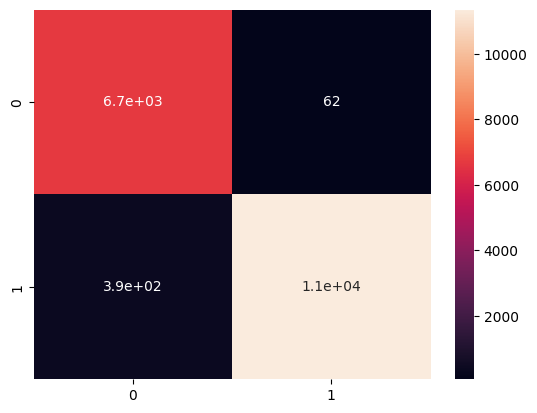

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

y_predict_train=NB_classifier.predict(X_train)
y_predict_train

cm=confusion_matrix(y_train,y_predict_train)

sns.heatmap(cm,annot=True)

[1 1 1 ... 1 0 1]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1607
           1       0.99      0.96      0.97      3011

    accuracy                           0.97      4618
   macro avg       0.96      0.97      0.96      4618
weighted avg       0.97      0.97      0.97      4618



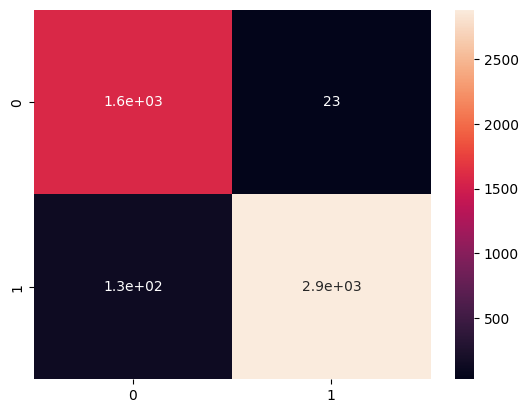

In [ ]:
y_predict_test=NB_classifier.predict(X_test)
print (y_predict_test)

cm=confusion_matrix(y_test,y_predict_test)


sns.heatmap(cm,annot=True)

print(classification_report(y_test,y_predict_test))

# Testing

In [ ]:
import pandas as pd
import zstandard as zstd
import json

#set confgiuration to display all columns
pd.set_option('display.max_columns', None)

# Path to your .zst file
zst_file_path = 'mcgill_submissions.zst'

# Decompress .zst file
with open(zst_file_path, 'rb') as compressed:
    dctx = zstd.ZstdDecompressor()
    with dctx.stream_reader(compressed) as reader:
        decompressed_data = reader.read().decode('utf-8')

# Assuming each line in the decompressed data is a separate JSON object
data = [json.loads(line) for line in decompressed_data.splitlines()]

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame to verify
df.head()

,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_text_color,author_flair_type,brand_safe,can_gild,contest_mode,created_utc,distinguished,domain,edited,gilded,hidden,hide_score,id,is_crosspostable,is_reddit_media_domain,is_self,is_video,link_flair_css_class,link_flair_richtext,link_flair_text,link_flair_text_color,link_flair_type,locked,media,media_embed,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,retrieved_on,rte_mode,score,secure_media,secure_media_embed,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,suggested_sort,thumbnail,thumbnail_height,thumbnail_width,title,url,whitelist_status,downs,num_reports,banned_by,name,likes,clicked,saved,ups,approved_by,selftext_html,created,report_reasons,user_reports,mod_reports,quarantine,from_id,from_kind,from,post_hint,preview,author_cakeday,view_count,approved_at_utc,banned_at_utc,can_mod_post,pinned,mod_note,mod_reason_by,mod_reason_title,crosspost_parent,crosspost_parent_list,subreddit_subscribers,media_metadata,author_flair_template_id,category,content_categories,is_original_content,media_only,post_categories,pwls,removal_reason,visited,wls,link_flair_background_color,previous_visits,link_flair_template_id,author_created_utc,author_fullname,is_meta,gildings,is_robot_indexable,author_patreon_flair,all_awardings,total_awards_received,allow_live_comments,discussion_type,author_premium,awarders,removed_by,removed_by_category,treatment_tags,poll_data,upvote_ratio,is_created_from_ads_ui,retrieved_utc,top_awarded_type,url_overridden_by_dest,gallery_data,is_gallery,call_to_action,collections
0,True,david_a_garcia,None,engineering,"[{'e': 'text', 't': 'Electrical Eng '10'}]",Electrical Eng '10,None,richtext,True,True,False,1265431507,None,self.mcgill,False,0.0,False,False,aypo9,True,False,True,False,None,[],None,dark,text,False,None,{},True,4,0.0,False,all_ads,/r/mcgill/comments/aypo9/is_this_working_yet/,1.522891e+09,markdown,1,None,{},,True,False,False,mcgill,t5_2rhkw,r/mcgill,public,None,self,NaN,NaN,is this working yet?,https://www.reddit.com/r/mcgill/comments/aypo9...,all_ads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,[deleted],NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,1299562966,None,self.mcgill,False,NaN,False,NaN,fzkkf,NaN,NaN,True,NaN,None,NaN,None,NaN,NaN,NaN,None,{},NaN,13,NaN,False,NaN,/r/mcgill/comments/fzkkf/advice_for_u0s/,NaN,NaN,5,NaN,NaN,I'm just finishing up my first year at McGill ...,NaN,NaN,NaN,mcgill,t5_2rhkw,NaN,NaN,NaN,default,NaN,NaN,Advice for U0's?,http://www.reddit.com/r/mcgill/comments/fzkkf/...,NaN,0.0,NaN,NaN,t3_fzkkf,NaN,False,False,5.0,NaN,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",1.299563e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,jakob5860,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,1300316295,None,self.mcgill,False,NaN,False,NaN,g5h9n,NaN,NaN,True,NaN,None,NaN,None,NaN,NaN,NaN,None,{},NaN,1,NaN,False,NaN,/r/mcgill/comments/g5h9n/ama_request_sean_turner/,NaN,NaN,2,NaN,NaN,,NaN,NaN,NaN,mcgill,t5_2rhkw,NaN,NaN,NaN,self,NaN,NaN,AMA Request: Sean Turner,http://www.reddit.com/r/mcgill/comments/g5h9n/...,NaN,0.0,NaN,NaN,t3_g5h9n,NaN,False,False,2.0,NaN,None,1.300320e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,mricon,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,1

In [ ]:
#combine title and selftext into one column called text
df['text'] = df['title'] + ' ' + df['selftext']

In [ ]:
df_new2 = df[['text']].copy()

In [ ]:
df_new2

,text
0,is this working yet?
1,Advice for U0's? I'm just finishing up my firs...
2,AMA Request: Sean Turner
3,I work in McGill central IT. AMA. I am a senio...
4,So how was the protest today?
...,...
60894,computer science grades minimum cut off [removed]
60895,HIST 219 [removed]
60896,HIST 219?? [removed]
60897,MGCR 222 with Prof Ody [removed]


In [ ]:
# Use NB_classifier on the df_new2 dataframe
spamham_countVectorizer=vectorizer.transform(df_new2['text'])
print(spamham_countVectorizer)

y_predict_test=NB_classifier.predict(spamham_countVectorizer)
print (y_predict_test)


  (0, 13847)	1
  (0, 24939)	1
  (0, 27481)	1
  (0, 27725)	1
  (1, 1595)	1
  (1, 1641)	1
  (1, 1951)	3
  (1, 1966)	1
  (1, 2374)	1
  (1, 2406)	2
  (1, 2584)	1
  (1, 2746)	3
  (1, 2829)	2
  (1, 2972)	2
  (1, 3251)	1
  (1, 3514)	1
  (1, 3567)	1
  (1, 3791)	1
  (1, 4616)	2
  (1, 4773)	1
  (1, 5483)	1
  (1, 5978)	1
  (1, 6289)	1
  (1, 6573)	1
  (1, 8207)	1
  :	:
  (60894, 6070)	1
  (60894, 6986)	1
  (60894, 11557)	1
  (60894, 16210)	1
  (60894, 17494)	1
  (60894, 20863)	1
  (60894, 21930)	1
  (60895, 447)	1
  (60895, 12407)	1
  (60895, 20863)	1
  (60896, 447)	1
  (60896, 12407)	1
  (60896, 20863)	1
  (60897, 457)	1
  (60897, 16045)	1
  (60897, 17487)	1
  (60897, 19559)	1
  (60897, 20863)	1
  (60897, 27377)	1
  (60898, 457)	1
  (60898, 16045)	1
  (60898, 17487)	1
  (60898, 19559)	1
  (60898, 20863)	1
  (60898, 27377)	1
[1 0 0 ... 0 0 0]


In [ ]:
df_new2['predicted_issue'] = y_predict_test

In [ ]:
df_new2

,text,predicted_issue
0,is this working yet?,1
1,Advice for U0's? I'm just finishing up my firs...,0
2,AMA Request: Sean Turner,0
3,I work in McGill central IT. AMA. I am a senio...,0
4,So how was the protest today?,1
...,...,...
60894,computer science grades minimum cut off [removed],1
60895,HIST 219 [removed],0
60896,HIST 219?? [removed],0
60897,MGCR 222 with Prof Ody [removed],0


In [ ]:
df_new2['predicted_issue'].value_counts()

predicted_issue
0    33735
1    27164
Name: count, dtype: int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=893dd5c2-ff0a-49e9-afe5-f4b2b61fffff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>